In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import pickle
import os
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS, Birch
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# 1.  Download  the  dataset,  load  into  a  pandas  data  frame,  and prepare the datasets for analysis.

In [5]:
df = pd.read_csv('CC GENERAL.csv')
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

print('The snap of the dataset is shown below')
df.sample(4)

The dataset has 8950 rows and 18 columns.
The snap of the dataset is shown below


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5437,C15590,287.817221,1.0,360.00,360.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,112.678222,208.247475,0.000000,12
1076,C11111,3409.130731,1.0,0.00,0.00,0.0,4459.741851,0.000000,0.000000,0.000000,0.666667,14,0,6000.0,2203.045653,1023.380975,0.000000,12
5362,C15514,1340.551352,1.0,427.96,331.96,96.0,618.344755,0.500000,0.333333,0.416667,0.166667,4,12,1500.0,326.956073,472.486843,0.000000,12
922,C10955,5980.582470,1.0,0.00,0.00,0.0,12008.080790,0.000000,0.000000,0.000000,0.416667,30,0,11000.0,9736.897362,1596.893256,0.083333,12


# 2. Exploratory Data Analysis (EDA):

#### 2.1. General information of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### 2.2. Null values

In [7]:
nulls = df.isnull().sum().sort_values(ascending=False)
print(f'There are {nulls.sum()} null values in the whole dataset.')

df.drop('CUST_ID', axis=1, inplace=True)

There are 314 null values in the whole dataset.


In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


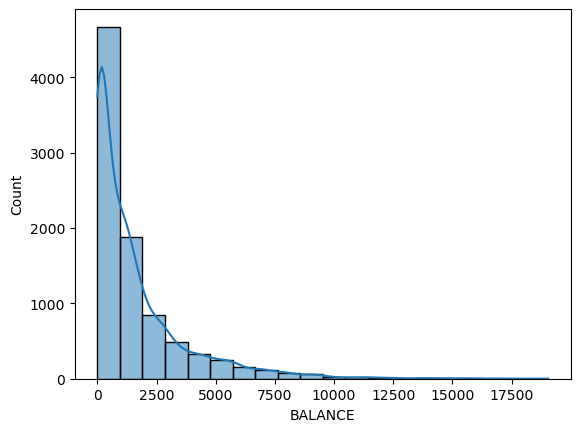

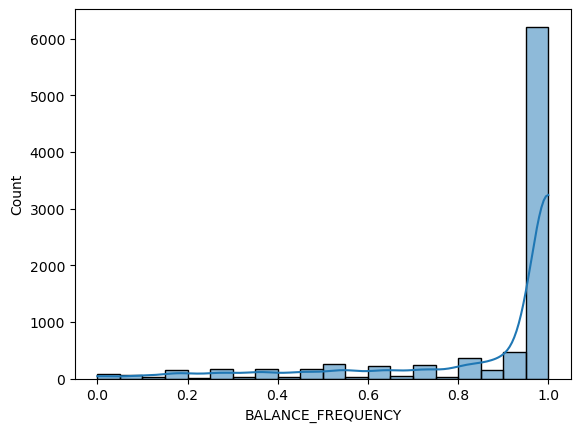

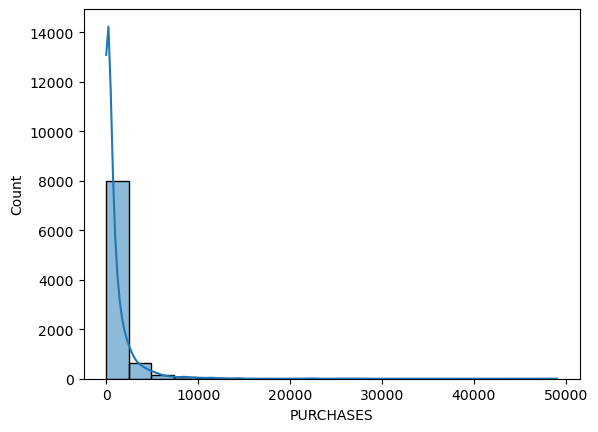

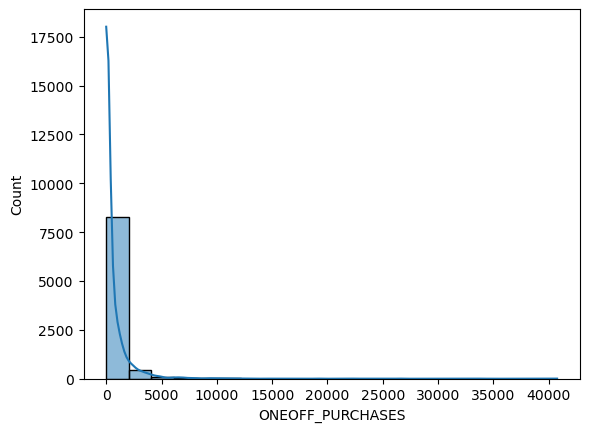

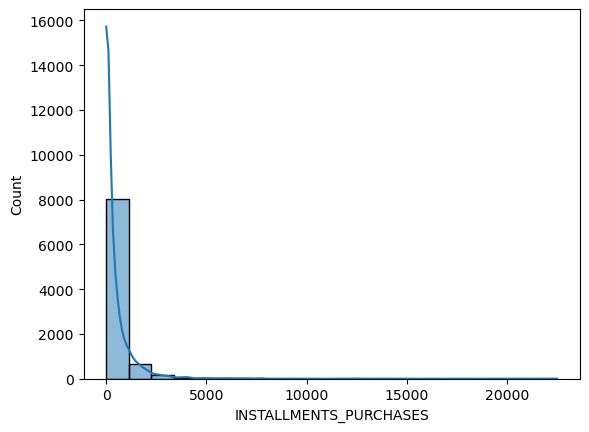

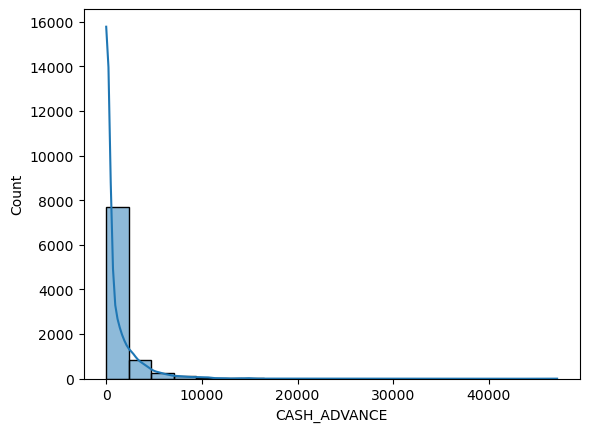

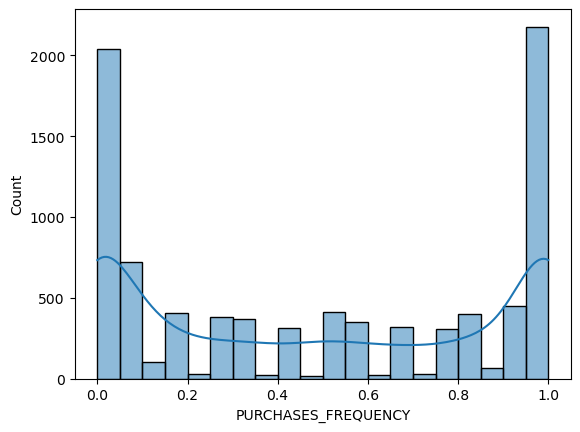

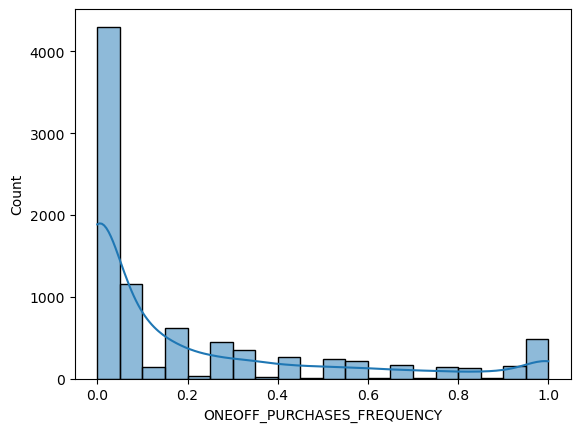

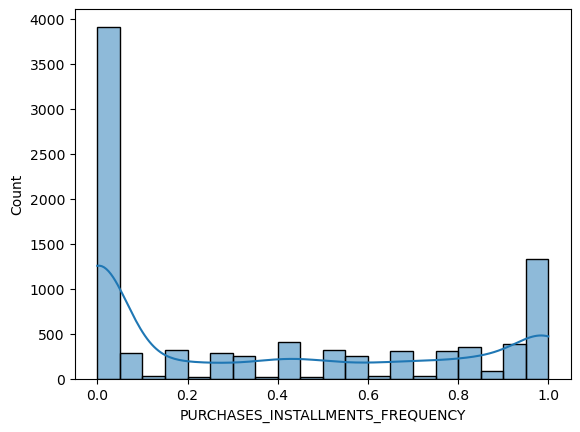

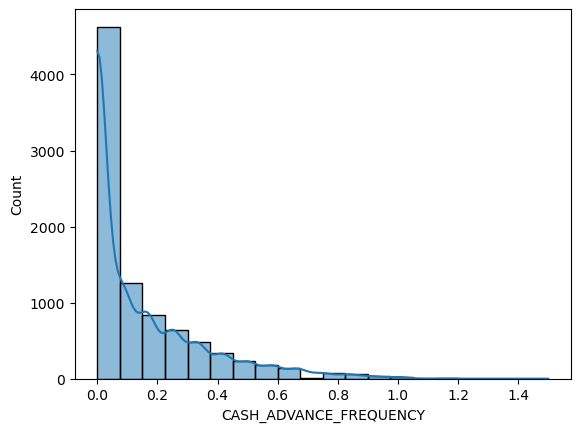

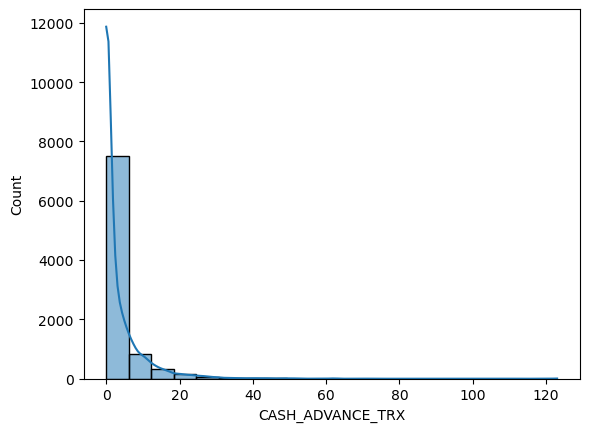

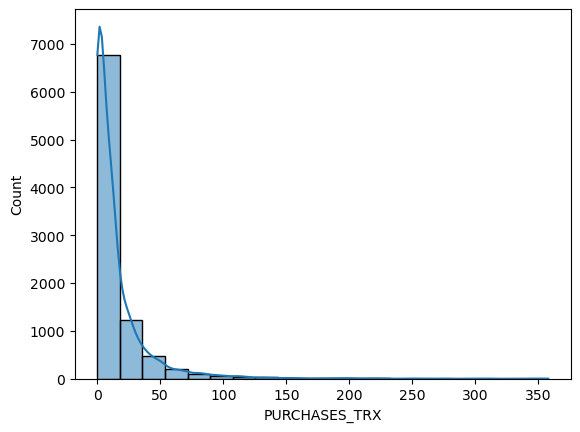

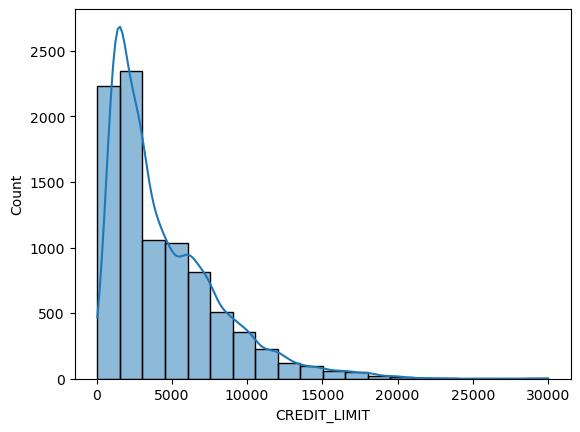

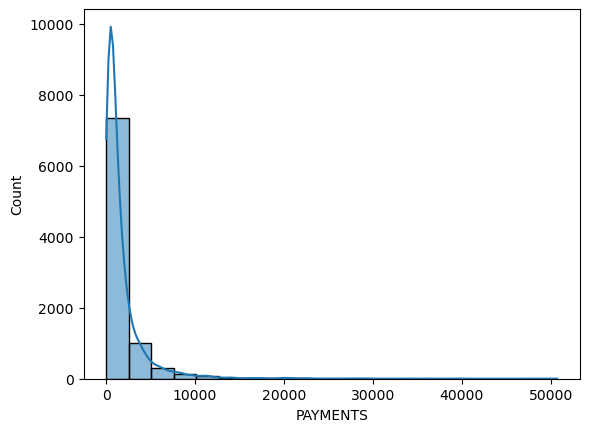

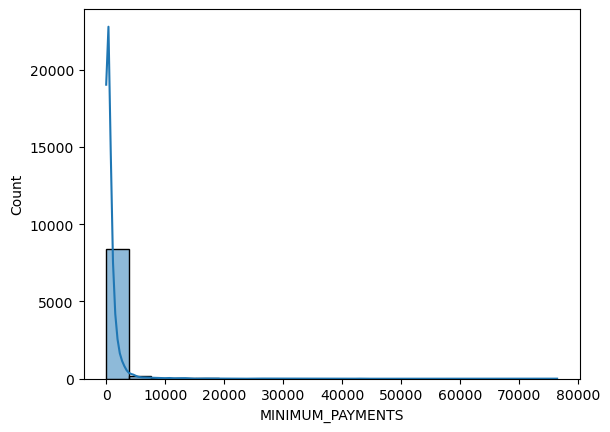

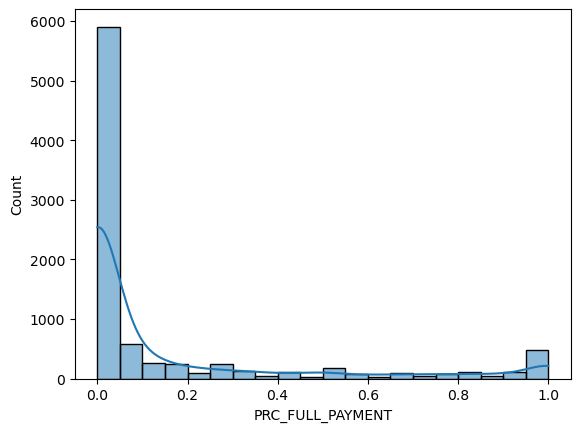

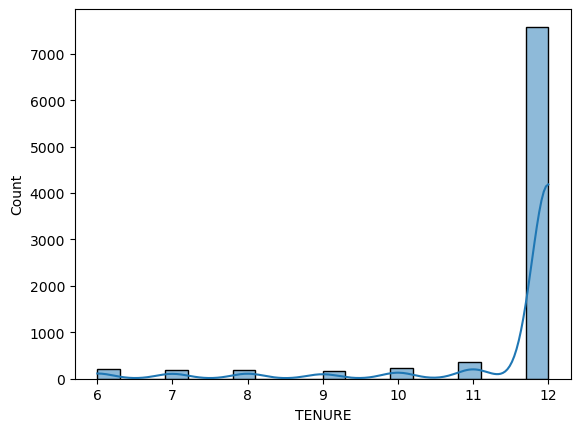

In [9]:
ncols = df.shape[1]
# fig, ax = plt.subplots(nrows=ncols//2, ncols=2 ,figsize=(10, 6))

for i, column in enumerate(df.columns):
    # axes = ax[i-1]
    sns.histplot(df[column], bins=20, kde=True)
    plt.show()

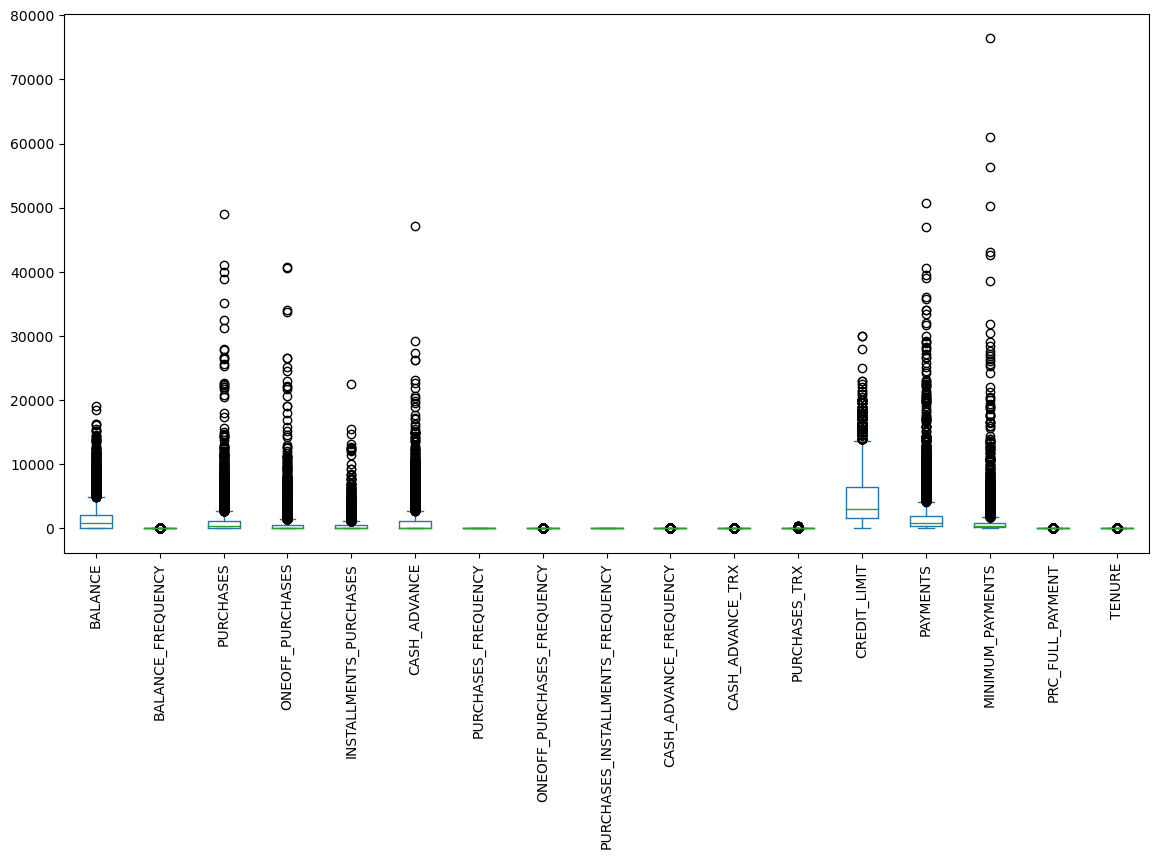

In [10]:
df.plot(kind = 'box', figsize=(14, 7))
plt.xticks(rotation =  90)
plt.show()

#### The dataset has outliers

In [11]:
column_means = df.mean()
df = df.fillna(column_means)


from scipy.cluster.hierarchy import linkage, dendrogram


# create a likage matrix
linkage_matrix = linkage(df, 'ward')

# plot a dendrogram



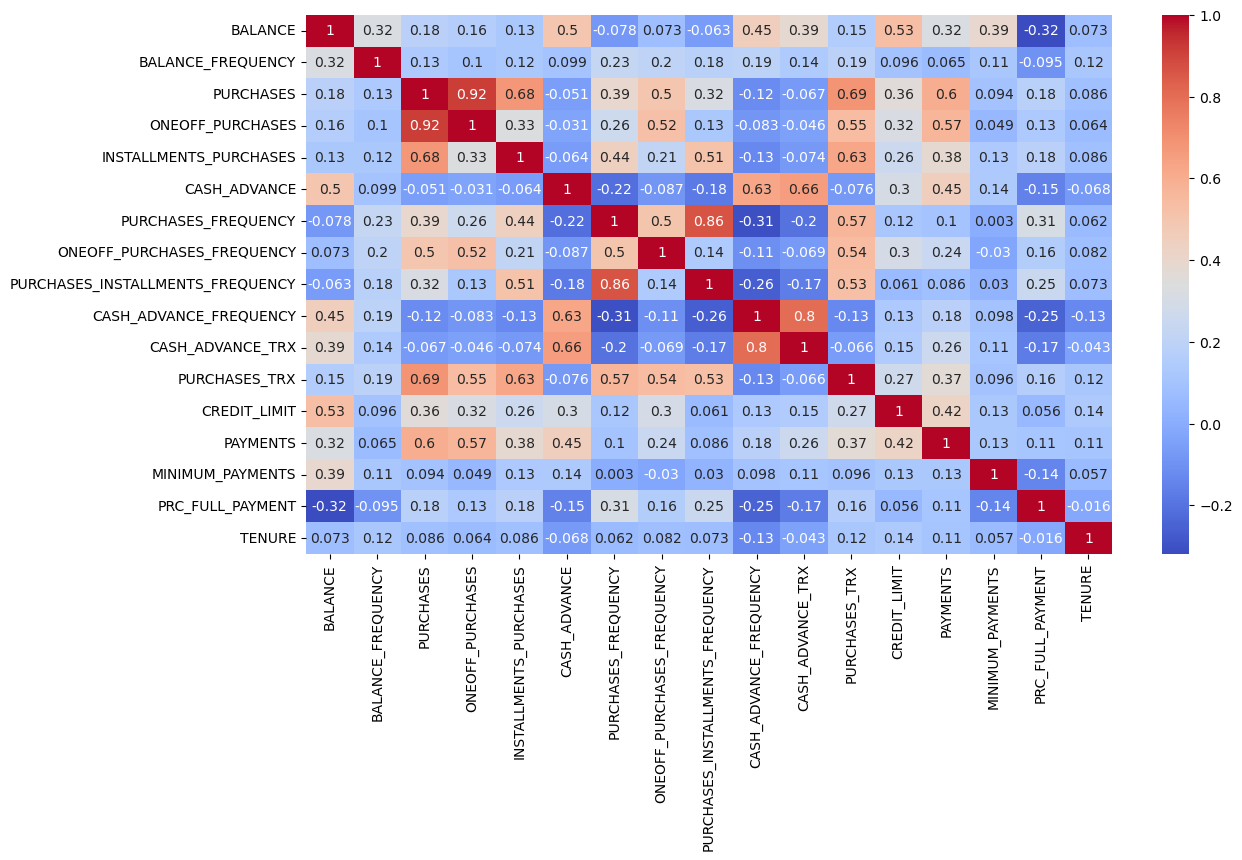

In [12]:
plt.figure(figsize=(13,7))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

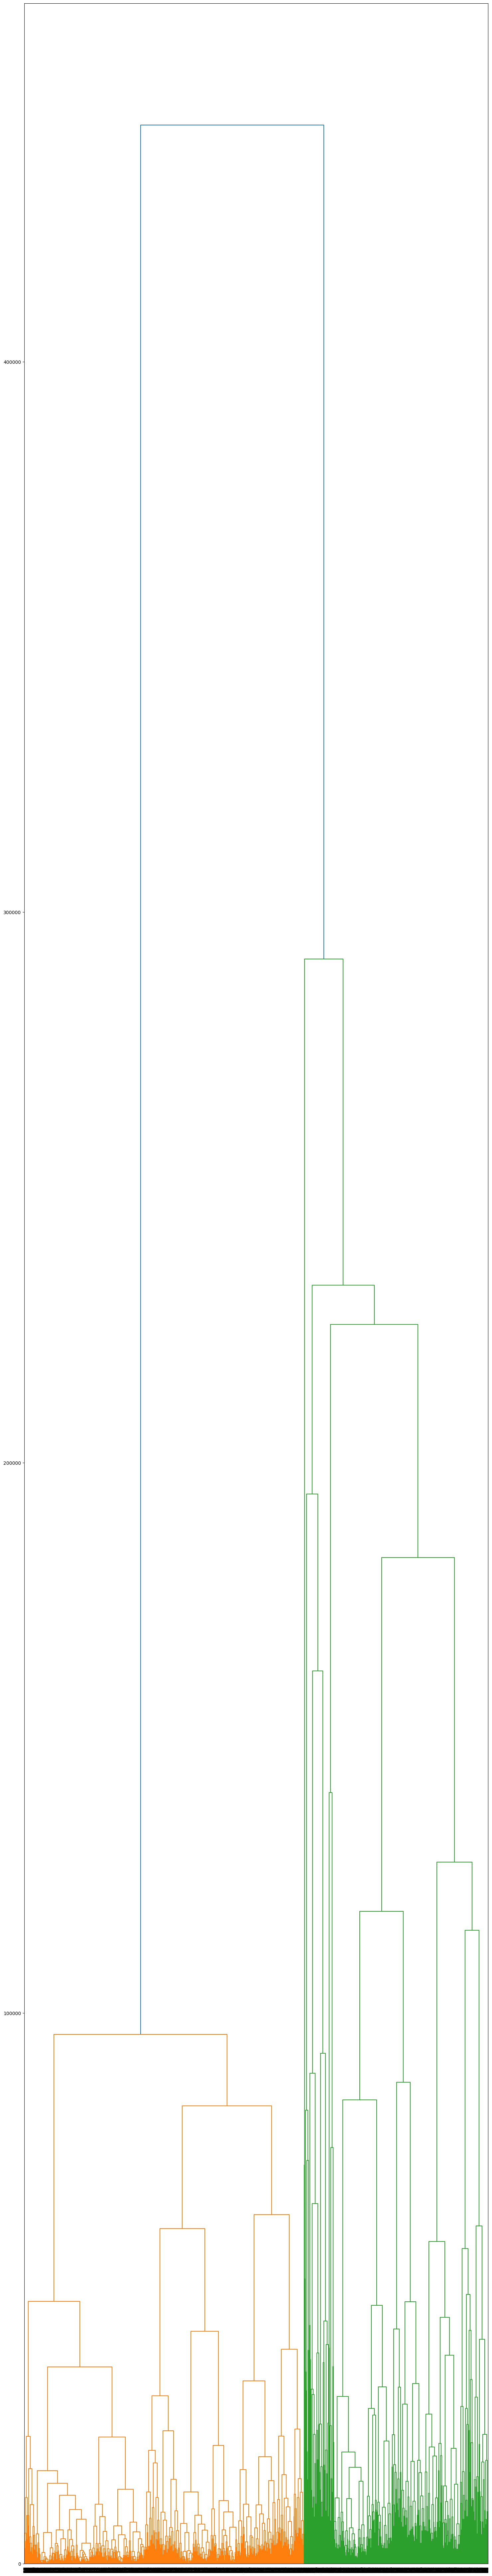

In [18]:
plt.figure(figsize=(18,100))
dendrogram(linkage_matrix)
plt.show()

In [14]:
# class ClusteringModelTrainer:
#     def __init__(self, X):
#         """
#         Initialize the ClusteringModelTrainer.

#         Parameters:
#         - X: Input data for clustering.
#         """
#         self.X = X
#         self.models = {
#             "KMeans": KMeans(n_clusters=3),
#             "MiniBatchKMeans": MiniBatchKMeans(n_clusters=3),
#             "AffinityPropagation": AffinityPropagation(),
#             "MeanShift": MeanShift(),
#             "SpectralClustering": SpectralClustering(n_clusters=3),
#             "AgglomerativeClustering": AgglomerativeClustering(n_clusters=3),
#             "DBSCAN": DBSCAN(),
#             "OPTICS": OPTICS(),
#             "Birch": Birch(n_clusters=3),
#             "GaussianMixture": GaussianMixture(n_components=3)
#         }
#         self.model_folder = "models"
#         self.metrics = {}

#     def evaluate_model(self, model):
#         """
#         Evaluate a clustering model using silhouette score.

#         Parameters:
#         - model: The trained clustering model.

#         Returns:
#         - silhouette_score: Silhouette score of the model.
#         """
#         if hasattr(model, 'labels_'):
#             # For models with 'labels_' attribute (e.g., KMeans)
#             labels = model.labels_
#         else:
#             # For models without 'labels_' attribute (e.g., GaussianMixture)
#             labels = model.predict(self.X)

#         # Check if there is only one unique label
#         if len(set(labels)) == 1:
#             return -1  # Return a default value when there's only one unique label

#         silhouette_score = metrics.silhouette_score(self.X, labels)
#         return silhouette_score



#     def train_models(self):
#         """
#         Train each clustering model separately and save it using pickle.
#         """
#         os.makedirs(self.model_folder, exist_ok=True)

#         for name, model in self.models.items():
#             model.fit(self.X)
#             self.metrics[name] = self.evaluate_model(model)
            
#             # Save each model separately using pickle
#             model_filename = f"{self.model_folder}/{name}_model.pkl"
#             with open(model_filename, 'wb') as model_file:
#                 pickle.dump(model, model_file)



#     def save_metrics(self, output_file="metrics.txt"):
#         """
#         Save evaluation metrics to a text file.

#         Parameters:
#         - output_file: File to save the metrics.
#         """
#         with open(output_file, "w") as file:
#             for name, score in self.metrics.items():
#                 file.write(f"{name}: {score}\n")

# # Example usage:
# if __name__ == "__main__":
#     # Generate sample data (replace this with your own dataset)
#     # X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
#     scaler = StandardScaler()
#     X = scaler.fit_transform(X)

#     # Create and train the ClusteringModelTrainer
#     trainer = ClusteringModelTrainer(X)
#     trainer.train_models()

#     # Save metrics
#     trainer.save_metrics()
#     with open("metrics.txt", "r") as file:
#         print(file.read())


In [17]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation
from sklearn import metrics
import pickle
import os
from sklearn.preprocessing import StandardScaler

class ClusteringModelTrainer:
    def __init__(self, X):
        """
        Initialize the ClusteringModelTrainer.

        Parameters:
        - X: Input data for clustering.
        """
        self.X = X
        self.model_folder = "models"
        self.metrics = {}

    def evaluate_model(self, model):
        """
        Evaluate a clustering model using silhouette score.

        Parameters:
        - model: The trained clustering model.

        Returns:
        - silhouette_score: Silhouette score of the model.
        """
        if hasattr(model, 'labels_'):
            # For models with 'labels_' attribute (e.g., KMeans)
            labels = model.labels_
        else:
            # For models without 'labels_' attribute (e.g., GaussianMixture)
            labels = model.predict(self.X)

        # Check if there is only one unique label
        if len(set(labels)) == 1:
            return -1  # Return a default value when there's only one unique label

        df['label'] = labels  # Add the labels to the dataframe
        df.to_csv(f'data_{model}.csv', index=False)  # Save the dataframe to a CSV file
        silhouette_score = metrics.silhouette_score(self.X, labels)
        return silhouette_score

    def train_and_save_model(self, model, model_name):
        """
        Train a clustering model and save it using pickle.

        Parameters:
        - model: The clustering model to train.
        - model_name: Name of the model for saving.

        Returns:
        - silhouette_score: Silhouette score of the trained model.
        """
        os.makedirs(self.model_folder, exist_ok=True)
        model.fit(self.X)
        self.metrics[model_name] = self.evaluate_model(model)
        
        # Save the model separately using pickle
        model_filename = f"{self.model_folder}/{model_name}_model.pkl"
        with open(model_filename, 'wb') as model_file:
            pickle.dump(model, model_file)

        return self.metrics[model_name]

    def save_metrics(self, output_file="metrics.txt"):
        """
        Save evaluation metrics to a text file.

        Parameters:
        - output_file: File to save the metrics.
        """
        with open(output_file, "w") as file:
            for name, score in self.metrics.items():
                file.write(f"{name}: {score}\n")

if __name__ == "__main__":
    # Generate sample data (replace this with your own dataset)
    # X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
    scaler = StandardScaler()
    X = scaler.fit_transform(df)

    # Create and train the ClusteringModelTrainer
    trainer = ClusteringModelTrainer(df)

    # Train and save each model
    kmeans_score = trainer.train_and_save_model(KMeans(n_clusters=3), "KMeans")
    minibatchkmeans_score = trainer.train_and_save_model(MiniBatchKMeans(n_clusters=3), "MiniBatchKMeans")
    affinitypropagation_score = trainer.train_and_save_model(AffinityPropagation(), "AffinityPropagation")

    # Save metrics
    trainer.save_metrics()
    with open("metrics.txt", "r") as file:
        print(file.read())


KMeans: 0.4651084224937809
MiniBatchKMeans: 0.42126070589275916
AffinityPropagation: 0.19668308804871448



In [19]:
pd.read_csv('data_AffinityPropagation().csv')

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,101
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,306
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,245
4,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,101
8946,8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,377
8947,8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,101
8948,8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,362
